In [1]:
import pandas as pd
import numpy as np
import preprocess
import matplotlib.pyplot as plt

In [2]:
col_names = ['Data Retention', 'Data Security', 'Do Not Track',
       'First Party Collection/Use', 'International and Specific Audiences',
       'Introductory/Generic', 'Policy Change', 'Practice not covered',
       'Privacy contact information', 'Third Party Sharing/Collection',
       'User Access, Edit and Deletion', 'User Choice/Control']

In [3]:
majority_path = r'C:\Users\IsmailKaraman\workspace\data\privacy_policy_data\OPP-115_v2\majority.csv'

In [4]:
df = pd.read_csv(majority_path)

In [5]:
df.head(3)

,text,Data Retention,Data Security,Do Not Track,First Party Collection/Use,International and Specific Audiences,Introductory/Generic,Policy Change,Practice not covered,Privacy contact information,Third Party Sharing/Collection,"User Access, Edit and Deletion",User Choice/Control
0,"""""Contact Us"""" Link If you contact us through...",0,0,0,1,0,0,0,0,0,0,0,0
1,(b) Information automatically collected There...,0,0,0,1,0,0,0,0,0,0,0,0
2,(ii) You have entered a contest or sweepstake...,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
data_dist = df[col_names].sum()
data_dist

Data Retention                            78
Data Security                            207
Do Not Track                              31
First Party Collection/Use              1181
International and Specific Audiences     296
Introductory/Generic                     378
Policy Change                            116
Practice not covered                     129
Privacy contact information              202
Third Party Sharing/Collection           931
User Access, Edit and Deletion           147
User Choice/Control                      352
dtype: int64

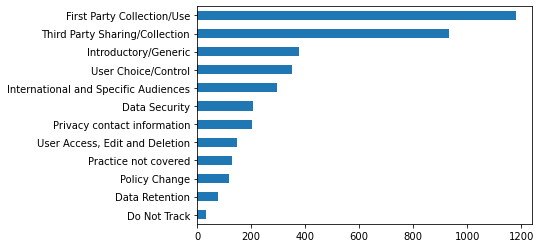

In [7]:
data_dist.sort_values().plot(kind='barh')

In [8]:
df.shape

(3399, 13)

In [90]:
# preprocessing text data
df['text'] = df['text'].apply(preprocess.preprocess_text)

KeyboardInterrupt: 

In [10]:
X = df['text']
y = df[col_names]

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X).toarray()

# a base classifier

In [12]:
def print_losses(y_test, preds, clf):
     
    print("\033[1m" + clf + ' results: ' + "\033[0m")
    print('----------------------')
    hamLoss = hamming_loss(y_test.values, preds)
    print('hamLoss: {:.2f}'.format(hamLoss))
    acc_score = accuracy_score(y_test.values, preds)
    print('Exact Match Ratio: {:.2f}'.format(acc_score))
    print('-----------------------------------------------')
    print("\033[1m" + 'Classification Report' + "\033[0m")
    print(classification_report(y_test.values, preds, target_names=list(y_test.columns)))
    print('--------------------------------------------------------------------------------------------')
    print()

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Linear SVM
svmClassifier = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svmClassifier.fit(X_train, y_train.values)
svmPreds = svmClassifier.predict(X_test)
print_losses(y_test, svmPreds, 'SVM Classifier')

# Random Forest
rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(X_train, y_train.values)
rfc_preds = rfc.predict(X_test)
print_losses(y_test, rfc_preds, 'Random Forest Classifier')

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values)
knn_preds = knn.predict(X_test)
print_losses(y_test, knn_preds, 'Random Forest Classifier')

SVM Classifier results: 
----------------------
hamLoss: 0.04
Exact Match Ratio: 0.59
-----------------------------------------------
Classification Report
                                      precision    recall  f1-score   support

                      Data Retention       0.67      0.18      0.29        11
                       Data Security       0.93      0.61      0.74        44
                        Do Not Track       1.00      0.62      0.77         8
          First Party Collection/Use       0.83      0.81      0.82       237
International and Specific Audiences       0.95      0.88      0.91        60
                Introductory/Generic       0.76      0.49      0.60        75
                       Policy Change       0.91      0.78      0.84        27
                Practice not covered       0.20      0.04      0.07        23
         Privacy contact information       0.91      0.62      0.74        32
      Third Party Sharing/Collection       0.84      0.67      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classifier results: 
----------------------
hamLoss: 0.05
Exact Match Ratio: 0.52
-----------------------------------------------
Classification Report
                                      precision    recall  f1-score   support

                      Data Retention       0.00      0.00      0.00        11
                       Data Security       1.00      0.43      0.60        44
                        Do Not Track       1.00      0.12      0.22         8
          First Party Collection/Use       0.88      0.75      0.81       237
International and Specific Audiences       1.00      0.58      0.74        60
                Introductory/Generic       0.94      0.39      0.55        75
                       Policy Change       1.00      0.67      0.80        27
                Practice not covered       0.00      0.00      0.00        23
         Privacy contact information       1.00      0.47      0.64        32
      Third Party Sharing/Collection       0.89      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classifier results: 
----------------------
hamLoss: 0.06
Exact Match Ratio: 0.46
-----------------------------------------------
Classification Report
                                      precision    recall  f1-score   support

                      Data Retention       1.00      0.18      0.31        11
                       Data Security       1.00      0.43      0.60        44
                        Do Not Track       1.00      0.62      0.77         8
          First Party Collection/Use       0.75      0.73      0.74       237
International and Specific Audiences       0.98      0.72      0.83        60
                Introductory/Generic       0.66      0.41      0.51        75
                       Policy Change       0.93      0.48      0.63        27
                Practice not covered       0.40      0.09      0.14        23
         Privacy contact information       0.85      0.34      0.49        32
      Third Party Sharing/Collection       0.85      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K-means

In [16]:
df_clustering = df.copy()

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12, random_state=0).fit(X)
df_clustering['kmeans_label'] = kmeans.labels_

In [18]:
df_clustering['kmeans_label'].value_counts()

1     1152
4      430
2      336
9      267
11     253
7      213
0      181
10     161
3      126
5      110
6      103
8       67
Name: kmeans_label, dtype: int64

In [19]:
data_dist

Data Retention                            78
Data Security                            207
Do Not Track                              31
First Party Collection/Use              1181
International and Specific Audiences     296
Introductory/Generic                     378
Policy Change                            116
Practice not covered                     129
Privacy contact information              202
Third Party Sharing/Collection           931
User Access, Edit and Deletion           147
User Choice/Control                      352
dtype: int64

In [20]:
for i in range(12):
    print(df_clustering[df_clustering['kmeans_label']==i][col_names].sum())
    print('-'*50)

Data Retention                            0
Data Security                             1
Do Not Track                              1
First Party Collection/Use               50
International and Specific Audiences      1
Introductory/Generic                     10
Policy Change                             1
Practice not covered                     11
Privacy contact information               1
Third Party Sharing/Collection          102
User Access, Edit and Deletion            1
User Choice/Control                      34
dtype: int64
--------------------------------------------------
Data Retention                           42
Data Security                            42
Do Not Track                             24
First Party Collection/Use              488
International and Specific Audiences     87
Introductory/Generic                    128
Policy Change                             8
Practice not covered                     63
Privacy contact information              30
Third Party 

## LDA topic models

In [21]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=12, random_state=0)
df_clustering['lda_labels'] = lda.fit_transform(X).argmax(axis=1)

In [22]:
df_clustering['lda_labels'].value_counts()

4     1548
11     596
3      278
2      261
1      239
8      176
10     102
9       78
7       50
6       28
5       24
0       19
Name: lda_labels, dtype: int64

In [23]:
for i in range(12):
    print(df_clustering[df_clustering['lda_labels']==i][col_names].sum())
    print('-'*50)

Data Retention                          2
Data Security                           0
Do Not Track                            0
First Party Collection/Use              2
International and Specific Audiences    4
Introductory/Generic                    5
Policy Change                           1
Practice not covered                    1
Privacy contact information             1
Third Party Sharing/Collection          3
User Access, Edit and Deletion          0
User Choice/Control                     1
dtype: int64
--------------------------------------------------
Data Retention                           0
Data Security                            9
Do Not Track                             0
First Party Collection/Use               6
International and Specific Audiences     8
Introductory/Generic                    70
Policy Change                           93
Practice not covered                     2
Privacy contact information             44
Third Party Sharing/Collection           7
Us

## SVD

In [24]:
from sklearn.decomposition import TruncatedSVD

In [25]:
# X = csr_matrix(X_dense)
svd = TruncatedSVD(n_components=12, n_iter=7, random_state=42)
df_clustering['svd_labels'] = svd.fit_transform(X).argmax(axis=1)

In [26]:
for i in range(12):
    print(df_clustering[df_clustering['svd_labels']==i][col_names].sum())
    print('-'*50)

Data Retention                           49
Data Security                            84
Do Not Track                             19
First Party Collection/Use              875
International and Specific Audiences     96
Introductory/Generic                    195
Policy Change                            18
Practice not covered                    105
Privacy contact information              71
Third Party Sharing/Collection          736
User Access, Edit and Deletion           72
User Choice/Control                     115
dtype: int64
--------------------------------------------------
Data Retention                            3
Data Security                             6
Do Not Track                              0
First Party Collection/Use                1
International and Specific Audiences     17
Introductory/Generic                    121
Policy Change                            91
Practice not covered                      8
Privacy contact information              69
Third Party 

## hierarchical clustering (AgglomerativeClustering)

In [27]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
df_clustering['agg_labels'] = agg_cluster.fit_predict(X)

In [28]:
for i in range(12):
    print(df_clustering[df_clustering['agg_labels']==i][col_names].sum())
    print('-'*50)

Data Retention                            2
Data Security                             1
Do Not Track                              0
First Party Collection/Use               10
International and Specific Audiences     22
Introductory/Generic                      1
Policy Change                             0
Practice not covered                      4
Privacy contact information               1
Third Party Sharing/Collection          119
User Access, Edit and Deletion            0
User Choice/Control                       0
dtype: int64
--------------------------------------------------
Data Retention                           21
Data Security                             3
Do Not Track                              0
First Party Collection/Use               60
International and Specific Audiences     13
Introductory/Generic                     26
Policy Change                            17
Practice not covered                     12
Privacy contact information             102
Third Party 

# DBScan

In [70]:
from sklearn.cluster import DBSCAN
dbscan_clustering = DBSCAN(eps=1, min_samples=2)
df_clustering['dbs_labels'] = dbscan_clustering.fit_predict(X)

In [72]:
for i in range(12):
    print(df_clustering[df_clustering['dbs_labels']==i][col_names].sum())
    print('-'*50)

Data Retention                           64
Data Security                           171
Do Not Track                             31
First Party Collection/Use              998
International and Specific Audiences    277
Introductory/Generic                    330
Policy Change                           111
Practice not covered                    114
Privacy contact information             180
Third Party Sharing/Collection          795
User Access, Edit and Deletion          127
User Choice/Control                     312
dtype: int64
--------------------------------------------------
Data Retention                          0
Data Security                           1
Do Not Track                            0
First Party Collection/Use              0
International and Specific Audiences    0
Introductory/Generic                    0
Policy Change                           0
Practice not covered                    1
Privacy contact information             0
Third Party Sharing/Collection

# SOM

In [88]:
from sklearn_som.som import SOM
som_clustering = SOM(m=12, n=10, dim=3735)
df_clustering['som_labels'] = som_clustering.fit_predict(X)

In [89]:
for i in range(12):
    print(df_clustering[df_clustering['dbs_labels']==i][col_names].sum())
    print('-'*50)

Data Retention                           64
Data Security                           171
Do Not Track                             31
First Party Collection/Use              998
International and Specific Audiences    277
Introductory/Generic                    330
Policy Change                           111
Practice not covered                    114
Privacy contact information             180
Third Party Sharing/Collection          795
User Access, Edit and Deletion          127
User Choice/Control                     312
dtype: int64
--------------------------------------------------
Data Retention                          0
Data Security                           1
Do Not Track                            0
First Party Collection/Use              0
International and Specific Audiences    0
Introductory/Generic                    0
Policy Change                           0
Practice not covered                    1
Privacy contact information             0
Third Party Sharing/Collection

In [29]:
labels_df = pd.DataFrame()
for label in df.columns.drop('text'):
    
    tmp_df = pd.DataFrame(df[df[label]==1]['text'].copy())
    tmp_df['label'] = label
    labels_df = pd.concat([labels_df, tmp_df])

In [30]:
labels_df.head()

,text,label
71,security kinja technical administrative physic...,Data Retention
75,data retention retain period fulfill purpose o...,Data Retention
76,data security integrity retention security int...,Data Retention
152,automatic receive store type interact web sit ...,Data Retention
207,change delete personal personally identifiable...,Data Retention


In [31]:
X_ = labels_df['text']
vectorizer = TfidfVectorizer()
X_ = vectorizer.fit_transform(X_).toarray()

In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_ = le.fit_transform(labels_df['label'])

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xt = pca.fit_transform(X_)

In [35]:
pca.explained_variance_ratio_

array([0.0191849 , 0.01622692])

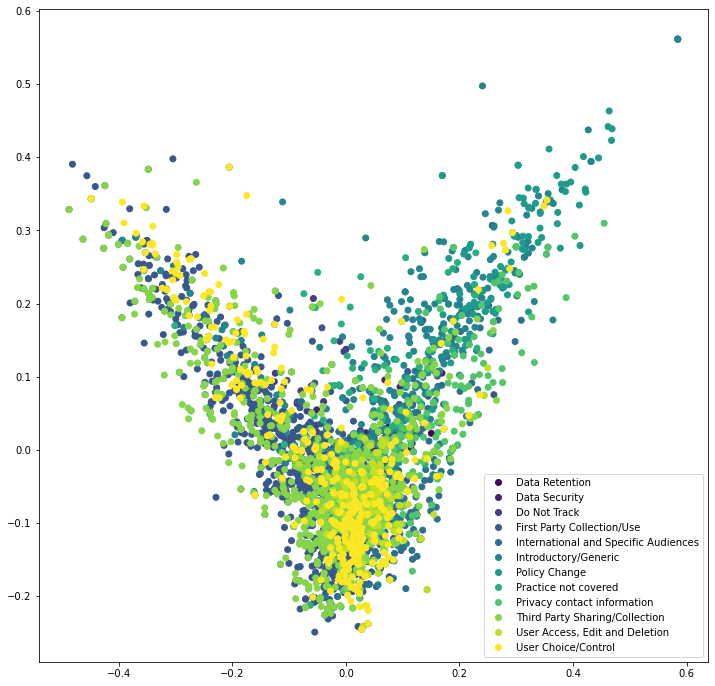

In [36]:
plt.figure(figsize=(12, 12))
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_)
plt.legend(handles=plot.legend_elements()[0], labels=list(le.classes_))
plt.show()

In [37]:
from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(X_)

In [38]:
# we need 1194 componenets from pca to explain 95% of the variance
import bisect
bisect.bisect(pca.explained_variance_ratio_.cumsum(), 0.95)

1194

In [39]:
len(Xt[0])

3735